## MARKET BASKET ANALYSIS-RESELLER & ONLINE

In [1]:
#import SQL library
import pyodbc
import pandas as pd #and dont forget pandas!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import mlxtend as ml

In [2]:
#establishes an open connection to SQL
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LENOVO-PC\SQLEXPRESS;'
                      'Database=AdventureWorks2012;'
                      'Trusted_Connection=yes;')

In [3]:
#pull sales data from SQL including region and product for assosiation recommendations

pythonSQLobject=pd.read_sql_query("""
SELECT * FROM [dbo].[AHG4]""", conn)

conn.close() # please close it after !

In [4]:
pythonSQLobject.head()

,CustomerID,ProductID,SalesOrderID,TerritoryID,ShipMethodID,SpecialOfferID,OrderDate,OnlineOrderFlag,ListPrice,OrderQty,...,Product_Subcategory,Product_Name,DaysToManufacture,Territory_Name,Territory_Code,Description,DiscountPct,Type,Category,Market_Channel
0,29825,776,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
1,29825,777,43659,5,5,1,2011-05-31,False,3374.99,3,...,Mountain Bikes,"Mountain-100 Black, 44",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
2,29825,778,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 48",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
3,29825,771,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 38",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
4,29825,772,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales


In [7]:
df = pythonSQLobject

In [8]:
df

,CustomerID,ProductID,SalesOrderID,TerritoryID,ShipMethodID,SpecialOfferID,OrderDate,OnlineOrderFlag,ListPrice,OrderQty,...,Product_Subcategory,Product_Name,DaysToManufacture,Territory_Name,Territory_Code,Description,DiscountPct,Type,Category,Market_Channel
0,29825,776,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
1,29825,777,43659,5,5,1,2011-05-31,False,3374.99,3,...,Mountain Bikes,"Mountain-100 Black, 44",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
2,29825,778,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 48",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
3,29825,771,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 38",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
4,29825,772,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121312,15868,878,75122,6,1,1,2014-06-30,True,21.98,1,...,Fenders,Fender Set - Mountain,0,Canada,CA,No Discount,0.0,No Discount,No Discount,Online Sales
121313,15868,712,75122,6,1,1,2014-06-30,True,8.99,1,...,Caps,AWC Logo Cap,0,Canada,CA,No Discount,0.0,No Discount,No Discount,Online Sales
121314,18759,878,75123,6,1,1,2014-06-30,True,21.98,1,...,Fenders,Fender Set - Mountain,0,Canada,CA,No Discount,0.0,No Discount,No Discount,Online Sales
121315,18759,879,75123,6,1,1,2014-06-30,True,159.00,1,...,Bike Stands,All-Purpose Bike Stand,0,Canada,CA,No Discount,0.0,No Discount,No Discount,Online Sales


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 26 columns):
CustomerID             121317 non-null int64
ProductID              121317 non-null int64
SalesOrderID           121317 non-null int64
TerritoryID            121317 non-null int64
ShipMethodID           121317 non-null int64
SpecialOfferID         121317 non-null int64
OrderDate              121317 non-null datetime64[ns]
OnlineOrderFlag        121317 non-null bool
ListPrice              121317 non-null float64
OrderQty               121317 non-null int64
UnitPrice              121317 non-null float64
Revenue                121317 non-null float64
StandardCost           121317 non-null float64
Product_Cost           121317 non-null float64
Profit                 121317 non-null float64
Product_Category       121317 non-null object
Product_Subcategory    121317 non-null object
Product_Name           121317 non-null object
DaysToManufacture      121317 non-null int64
Territory_N

In [9]:
df.shape

(121317, 26)

### There is a little cleanup, we need to do. First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have SalesOrderID numbers and remove the credit transactions (those with SalesOrderID numbers containing C).

In [12]:
#df['Product_Name'] = df['Product_Name'].str.strip('-')
#df['Product_Name'] = df['Product_Name'].[x.strip('-') for x in df.['Product_Name']
#df.Product_Name = [x.strip('-') for x in df.Product_Name]

#df.Product_Name = df.Product_Name.apply(lambda x: x.replace('-',''))
#df.Product_Name = df.Product_Name.apply(lambda x: x.replace(',',''))
#df.Product_Name = df.Product_Name.apply(lambda x: x.replace(' ',''))

df.dropna(axis=0, subset=['SalesOrderID'], inplace=True)
df['SalesOrderID'] = df['SalesOrderID'].astype('str')
df = df[~df['SalesOrderID'].str.contains('C')]
df.head()

,CustomerID,ProductID,SalesOrderID,TerritoryID,ShipMethodID,SpecialOfferID,OrderDate,OnlineOrderFlag,ListPrice,OrderQty,...,Product_Subcategory,Product_Name,DaysToManufacture,Territory_Name,Territory_Code,Description,DiscountPct,Type,Category,Market_Channel
0,29825,776,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
1,29825,777,43659,5,5,1,2011-05-31,False,3374.99,3,...,Mountain Bikes,"Mountain-100 Black, 44",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
2,29825,778,43659,5,5,1,2011-05-31,False,3374.99,1,...,Mountain Bikes,"Mountain-100 Black, 48",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
3,29825,771,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 38",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales
4,29825,772,43659,5,5,1,2011-05-31,False,3399.99,1,...,Mountain Bikes,"Mountain-100 Silver, 42",4,Southeast,US,No Discount,0.0,No Discount,No Discount,Reseller Sales


In [13]:
df.shape

(121317, 26)

#### After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
#### For the sake of keeping the data set small, I’m only looking at sales for 6 countries in indivisual sections. However, in additional code below, 
#### I will compare these results to sales from all countries. 
#### Further country comparisons would be interesting to investigate.

## ONLINE SALES

In [14]:
basket1 = (df[df['Market_Channel'] =="Online Sales"]
          .groupby(['SalesOrderID','Product_Name'])['OrderQty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('SalesOrderID'))
basket1.head()

Product_Name,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
SalesOrderID,,,,,,,,,,,,,,,,,,,,,
43697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Here’s what the first few columns look like above

In [15]:
basket1.shape

(27659, 130)

#### There are a lot of zeros in the data but 
#### we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. 
#### This step will complete the one hot encoding of the data

In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units)
basket_sets1.head()

Product_Name,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
SalesOrderID,,,,,,,,,,,,,,,,,,,,,
43697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
basket_sets1.shape

(27659, 130)

#### Now that the data is structured properly, 
#### we can generate frequent item sets that have a support of at least 5% (this number was chosen so that I could get enough useful example

#### The final step is to generate the rules with their corresponding support, confidence and lift:

In [18]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.03, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.sort_values('confidence', ascending = False, inplace = True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Road Bottle Cage),(Water Bottle - 30 oz.),0.061897,0.153440,0.054991,0.888435,5.790107,0.045494,7.588013
3,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.073213,0.153440,0.061174,0.835556,5.445483,0.049940,5.147999
1,(HL Mountain Tire),(Mountain Tire Tube),0.050472,0.111898,0.034600,0.685530,6.126358,0.028952,2.824122
2,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.153440,0.073213,0.061174,0.398680,5.445483,0.049940,1.541255
4,(Water Bottle - 30 oz.),(Road Bottle Cage),0.153440,0.061897,0.054991,0.358388,5.790107,0.045494,1.462104
0,(Mountain Tire Tube),(HL Mountain Tire),0.111898,0.050472,0.034600,0.309208,6.126358,0.028952,1.374551


In [19]:
ONLINE = rules1[ (rules1['lift'] >= 5.0) &
        (rules1['confidence'] >= 0.3)]
ONLINE.sort_values('confidence', ascending = False, inplace = True)
ONLINE

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Road Bottle Cage),(Water Bottle - 30 oz.),0.061897,0.153440,0.054991,0.888435,5.790107,0.045494,7.588013
3,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.073213,0.153440,0.061174,0.835556,5.445483,0.049940,5.147999
1,(HL Mountain Tire),(Mountain Tire Tube),0.050472,0.111898,0.034600,0.685530,6.126358,0.028952,2.824122
2,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.153440,0.073213,0.061174,0.398680,5.445483,0.049940,1.541255
4,(Water Bottle - 30 oz.),(Road Bottle Cage),0.153440,0.061897,0.054991,0.358388,5.790107,0.045494,1.462104
0,(Mountain Tire Tube),(HL Mountain Tire),0.111898,0.050472,0.034600,0.309208,6.126358,0.028952,1.374551


In [20]:
rules1.shape

(6, 9)

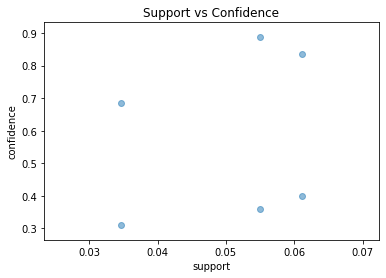

In [21]:
plt.scatter(rules1['support'],
rules1['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [22]:
data_online = pd.DataFrame([rules1['antecedents'],rules1['consequents']])

In [23]:
data_online

,5,3,1,2,4,0
antecedents,(Road Bottle Cage),(Mountain Bottle Cage),(HL Mountain Tire),(Water Bottle - 30 oz.),(Water Bottle - 30 oz.),(Mountain Tire Tube)
consequents,(Water Bottle - 30 oz.),(Water Bottle - 30 oz.),(Mountain Tire Tube),(Mountain Bottle Cage),(Road Bottle Cage),(HL Mountain Tire)


In [ ]:
#RoadBottleCage= (df.loc[df['Product_Name'] == 'RoadBottleCage']) & (df.loc[df['Product_Name'] == 'WaterBottle30oz'])

RoadBottleCage_WaterBottle30oz = df[df['Product_Name'].isin(['RoadBottleCage', 'WaterBottle30oz.'])]
MountainBottleCage_WaterBottle30oz = df[df['Product_Name'].isin(['MountainBottleCage', 'WaterBottle30oz.'])]

HLMountainTire_MountainTireTube = df[df['Product_Name'].isin(['HLMountainTire', 'MountainTireTube'])]
WaterBottle30oz_MountainBottleCage = df[df['Product_Name'].isin(['WaterBottle30oz.', 'MountainBottleCage'])]

MountainTireTube_HLMountainTire = df[df['Product_Name'].isin(['MountainTireTube', 'HLMountainTire'])]

In [ ]:
onl = pd.DataFrame(df, columns = [RoadBottleCage_WaterBottle30oz,MountainBottleCage_WaterBottle30oz,HLMountainTire_MountainTireTube])

In [ ]:
cols = ['RoadBottleCage_WaterBottle30oz','MountainBottleCage_WaterBottle30oz','HLMountainTire_MountainTireTube','WaterBottle30oz_MountainBottleCage','MountainTireTube_HLMountainTire']
my_df2  = pd.DataFrame(columns = cols)
#my_df = my_df.append(my_df2)

In [ ]:
my_df2

In [ ]:
filename = 'RoadBottleCage_WaterBottle30oz.csv'
RoadBottleCage_WaterBottle30oz.to_csv(filename, index=False)

In [ ]:
filename = 'MountainBottleCage_WaterBottle30oz.csv'
MountainBottleCage_WaterBottle30oz.to_csv(filename, index=False)

In [ ]:
filename = 'HLMountainTire_MountainTireTube.csv'
HLMountainTire_MountainTireTube.to_csv(filename, index=False)

In [ ]:
filename = 'WaterBottle30oz_MountainBottleCage.csv'
MountainTireTube_HLMountainTire.to_csv(filename, index=False)

In [ ]:
Online_Pro = df[df['Product_Name'].isin(['RoadBottleCage', 'MountainBottleCage','MountainBottleCage','WaterBottle30oz.','MountainTireTube'])]
Online_Pro.head()

In [ ]:
RoadBottleCage_WaterBottle30oz

In [ ]:
filename = 'Online_Pro.csv'
Online_Pro.to_csv(filename, index=False)

In [ ]:
WaterBottle30oz= df.loc[df['Product_Name'] == 'WaterBottle30oz.']
HLMountainTire= df.loc[df['Product_Name'] == 'HLMountainTire']
HLMountainTire= df.loc[df['Product_Name'] == 'MountainTireTube']
WaterBottle30oz= df.loc[df['Product_Name'] == 'MountainBottleCage']
MountainTireTube= df.loc[df['Product_Name'] == 'RoadBottleCage']

In [ ]:
Online_Pro1 = df[df['Product_Name'].isin(['WaterBottle30oz.', 'HLMountainTire','MountainTireTube','MountainBottleCage','RoadBottleCage'])]
Online_Pro1.head()

In [ ]:
filename = 'Online_Pro1.csv'
Online_Pro1.to_csv(filename, index=False)

In [ ]:
WaterBottle30oz= df.loc[df['Product_Name'] == 'WaterBottle30oz.']
#df['Product_Name'] =="RoadBottleCage"
WaterBottle30oz.head()

In [ ]:
WaterBottle30oz["WaterBottle30oz"].groupby().size()